<a href="https://colab.research.google.com/github/RahmiaWati431/KematanganTomatMenggunakanMachineLearning/blob/main/NVBsplitTanpaCrop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.listdir('/content/drive/MyDrive/Penelitian/DatasetBuah'))

['Matang', 'Mentah', 'SetengahMatang']


In [ ]:
# Tahap 3: Ekstraksi Fitur RGB dari Gambar (Crop Tengah 1000x1000)
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Path ke folder utama dataset
base_path = '/content/drive/MyDrive/Penelitian/DatasetBuah'

# Label sesuai nama subfolder (pastikan sama persis!)
labels = ['Mentah', 'SetengahMatang', 'Matang']
data = []

# Fungsi ekstrak rata-rata warna RGB dari bagian tengah gambar
def extract_rgb(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Gambar tidak terbaca")
    avg_color = img.mean(axis=0).mean(axis=0)  # format BGR
    return avg_color[2], avg_color[1], avg_color[0]  # konversi ke RGB



# Proses semua gambar dari setiap folder label
for label in labels:
    folder = os.path.join(base_path, label)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        try:
            r, g, b = extract_rgb(img_path)
            data.append([img_name, r, g, b, label])
        except Exception as e:
            print(f"Gagal memproses {img_path}: {e}")

# Simpan jadi DataFrame
df = pd.DataFrame(data, columns=['Filename', 'R', 'G', 'B', 'Label'])

# Lihat jumlah data per label
print("Jumlah data per label:")
print(df['Label'].value_counts())

# Tampilkan beberapa data pertama dari tiap label
print("\nContoh data dari masing-masing label:")
for label in labels:
    print(f"\nLabel: {label}")
    display(df[df['Label'] == label].head(70))

# Simpan DataFrame ke file csv
output_path = '/content/drive/MyDrive/Penelitian/Berkas/TanpaCrop/DatasetTomatTanpacrop.csv'
df.to_csv(output_path, index=False)
print(f"\n✅ Data berhasil disimpan ke csv di: {output_path}")

Jumlah data per label:
Label
Mentah            70
SetengahMatang    70
Matang            70
Name: count, dtype: int64

Contoh data dari masing-masing label:

Label: Mentah


,Filename,R,G,B,Label
0,IMG_20250306_201145.jpg,197.193354,191.196866,171.160249,Mentah
1,IMG_20250306_201150.jpg,196.315638,191.019204,171.437795,Mentah
2,IMG_20250306_201155.jpg,198.709871,194.028234,182.167956,Mentah
3,IMG_20250306_201158.jpg,199.852244,194.192701,181.590740,Mentah
4,IMG_20250306_201204.jpg,200.104115,192.746118,178.556705,Mentah
...,...,...,...,...,...
65,IMG_20250306_203254.jpg,191.589236,188.479698,174.728168,Mentah
66,IMG_20250306_203259.jpg,191.877110,188.012864,172.902621,Mentah
67,IMG_20250306_203319.jpg,196.319272,188.713643,176.483554,Mentah
68,IMG_20250306_203333.jpg,195.803308,188.866435,173.710685,Mentah



Label: SetengahMatang


,Filename,R,G,B,Label
70,IMG_20250306_201854.jpg,202.831967,187.879785,179.008437,SetengahMatang
71,IMG_20250306_201859.jpg,199.651622,188.460372,176.346527,SetengahMatang
72,IMG_20250306_201903.jpg,196.542253,187.509791,177.017282,SetengahMatang
73,IMG_20250306_201910.jpg,200.476506,189.647592,172.940688,SetengahMatang
74,IMG_20250306_201913.jpg,194.140859,188.719256,175.964953,SetengahMatang
...,...,...,...,...,...
135,IMG_20250306_203414.jpg,193.616367,177.671571,165.570277,SetengahMatang
136,IMG_20250306_203409.jpg,196.006010,179.521022,162.514798,SetengahMatang
137,IMG_20250306_203435.jpg,192.460382,177.034060,163.993143,SetengahMatang
138,IMG_20250306_203509.jpg,193.215814,179.882494,168.477089,SetengahMatang



Label: Matang


,Filename,R,G,B,Label
140,IMG_20250306_200431.jpg,197.620620,178.697473,168.507793,Matang
141,IMG_20250306_200437.jpg,196.107317,180.309009,168.442560,Matang
142,IMG_20250306_200443.jpg,197.794676,180.315478,171.379369,Matang
143,IMG_20250306_200450.jpg,196.328778,181.063007,173.656740,Matang
144,IMG_20250306_200456.jpg,199.716403,181.250523,172.679226,Matang
...,...,...,...,...,...
205,IMG_20250306_203101.jpg,187.269276,178.052806,169.312682,Matang
206,IMG_20250306_203110.jpg,189.633911,181.026481,173.220548,Matang
207,IMG_20250306_203140.jpg,193.123615,177.861685,171.856463,Matang
208,IMG_20250306_203157.jpg,193.458226,176.559067,172.216757,Matang



✅ Data berhasil disimpan ke csv di: /content/drive/MyDrive/Penelitian/Berkas/TanpaCrop/DatasetTomatTanpacrop.csv


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scipy.stats import ttest_rel

# Pisahkan fitur (R, G, B) dan label
X = df[['R', 'G', 'B']]  # Fitur
y = df['Label']           # Label

# Split data: 70% untuk latih, 30% untuk uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# --- Model Naive Bayes ---
nb_model = GaussianNB()  # Menggunakan Naive Bayes
nb_model.fit(X_train, y_train)  # Melatih model Naive Bayes
nb_pred = nb_model.predict(X_test)  # Memprediksi data uji

# Evaluasi hasil Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_pred) * 100  # Konversi ke persen
print(f"🔸 Naive Bayes Accuracy: {nb_accuracy:.2f}%")

🔸 Naive Bayes Accuracy: 72.62%



📊 Confusion Matrix - Naive Bayes


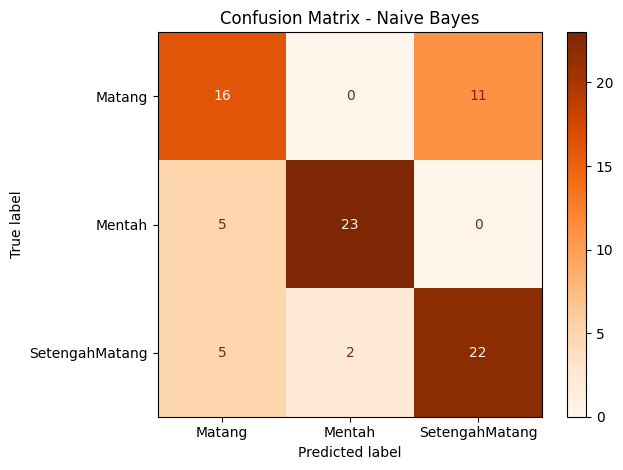

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# --- Confusion Matrix Naive Bayes ---
print("\n📊 Confusion Matrix - Naive Bayes")
ConfusionMatrixDisplay.from_estimator(nb_model, X_test, y_test, cmap='Oranges')
plt.title('Confusion Matrix - Naive Bayes')
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# ===== Simpan Hasil Prediksi ke CSV (untuk Uji McNemar) - Naive Bayes =====
df_pred_nb_crop = pd.DataFrame({
    'Filename': X_test.index.map(lambda i: df.iloc[i]['Filename']),
    'Actual': y_test.values,
    'Predicted_NB_Crop': nb_pred  # Pastikan nb_pred adalah hasil prediksi dari model Naive Bayes
})

crop_pred_path_nb = '/content/drive/MyDrive/Penelitian/Berkas/TanpaCrop/60:40/nvb/mcnemar/Prediksi_NB_TanpaCrop_60:40.csv'
df_pred_nb_crop.to_csv(crop_pred_path_nb, index=False)
print(f"\n✅ Hasil prediksi Naive Bayes (crop) disimpan di: {crop_pred_path_nb}")



✅ Hasil prediksi SVM (crop) disimpan di: /content/drive/MyDrive/Penelitian/Berkas/TanpaCrop/60:40/svm/mcnemar/Prediksi_SVM_TanpaCrop_60:40.csv
